### ***Task-2***

---



Create a k-means clusturing algorithm to group customer of a retail store based on their purchase history.


Dataset :https://www.canva.com/link?target=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fvjchoudhary7%2Fcustomer-segmentation-tutorial-in-python&design=DAFpRxy47kU&accessRole=viewer&linkSource=document

Importing neccesary library from python

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df= pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Analysing data before predictive modeling

Text(0, 0.5, 'Spending Score')

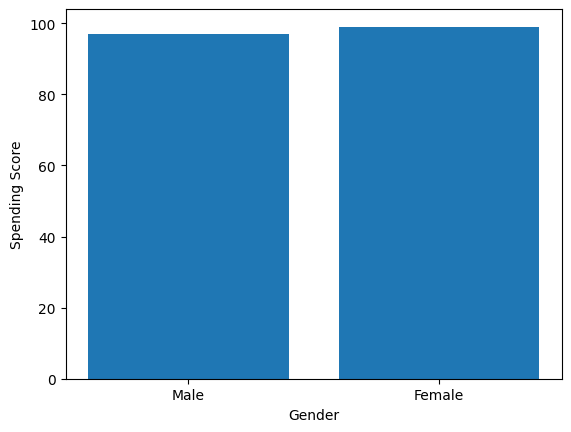

In [4]:
# checking if gender is a parameter to impact Spending Score
plt.bar(df.Gender,df['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score')

In [5]:
# As Gender affect Spending Score negligibly .... We wil not use this parameter for prediction.

Text(0, 0.5, 'Spending Score')

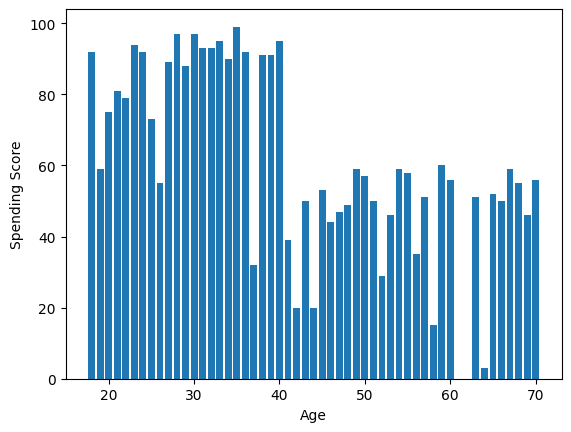

In [6]:
# checking if age is a parameter to impact Spending Score
plt.bar(df.Age,df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [7]:
# Age is affecting the Spending Score..... Young people spend more than aged ones.

Text(0, 0.5, 'Spending Score')

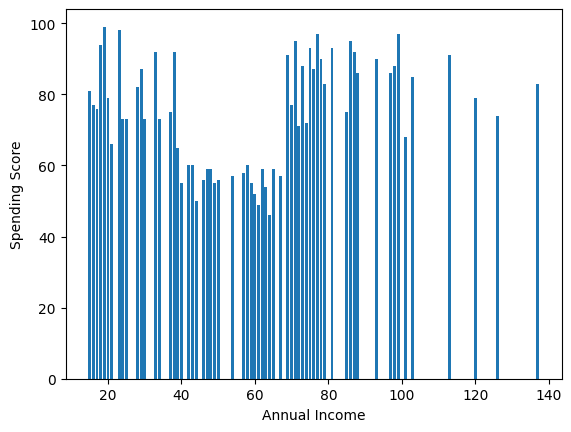

In [8]:
# checking if Annual Income is a parameter to impact Spending Score
plt.bar(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [9]:
# We can see that people across all income have mostly similar Spending Score excepting customer with Annual income from 40000$ to 70000$.

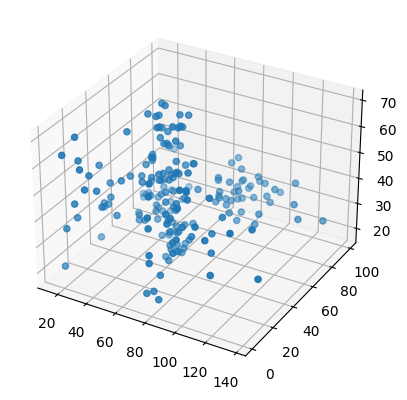

In [10]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining all 3 axis
z = df[['Age']]
x = df[['Annual Income (k$)']]
y = df[['Spending Score (1-100)']]


# plotting
ax.scatter3D(x, y, z, 'green')

plt.show()

In [11]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

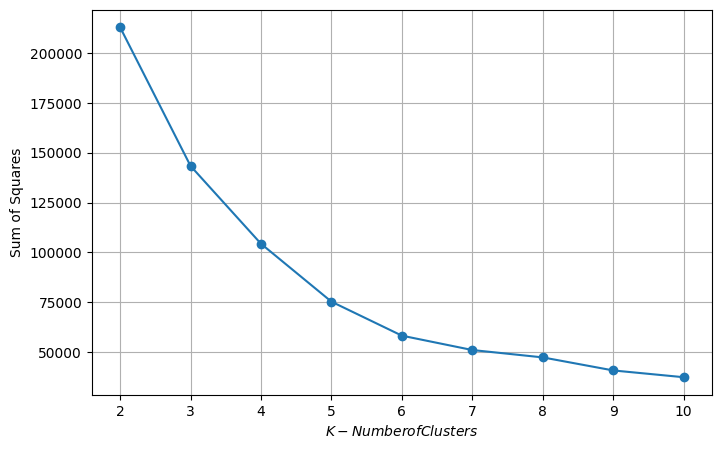

In [12]:
sse = []
krange = list(range(2,11))
X = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].values
for n in krange:
    model = KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

# Plot the results.
fig = plt.figure(figsize = (8,5))
plt.plot(krange, sse, marker='o')
plt.xlabel("$K - Number of Clusters$")
plt.ylabel("Sum of Squares")
plt.grid(True)
plt.show()

Creating model for prediction

In [33]:
# value of no of cluster would be 5.
kmeans = KMeans(n_clusters=5).fit(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

df = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].copy(deep=True)
df['Cluster'] = kmeans.labels_
df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,0
2,20,16,6,2
3,23,16,77,0
4,31,17,40,2
5,22,17,76,0
6,35,18,6,2
7,23,18,94,0
8,64,19,3,2
9,30,19,72,0


<ipython-input-34-b109a4c7ebfb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.Cluster,y=df['Spending Score (1-100)'],ci=None)


<Axes: xlabel='Cluster', ylabel='Spending Score (1-100)'>

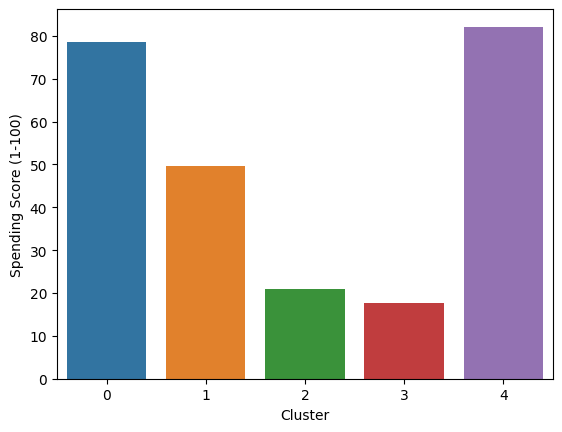

In [34]:
sns.barplot(x=df.Cluster,y=df['Spending Score (1-100)'],ci=None)

Conclusion=Cluster no 0 and 4 are the highest quality customers